In [2]:
import numpy as np
import pandas as pd

## Seqmented Univariate - Session 4

In [ ]:
census_df = pd.read_csv('EDA_census_csv.csv')

In [ ]:
census_df.describe()

In [ ]:
census_df_age_24 = census_df.loc[ (census_df['AreaName']=='INDIA')  &  (census_df['AgeGroup']=='20-24') & (census_df['TotRurUrb']=='Total')]

In [ ]:
census_df_age_24

In [ ]:
#What percentage of females in the age group 20-24 are illiterate in India, i.e. 
#out of all the females in the age group 20-24, what fraction is illiterate?

perc1 = (census_df_age_24['IlliterateFemales']/census_df_age_24['TotFemales']) * 100
perc1

In [ ]:
census_df_all_age = census_df.loc[ (census_df['AreaName']=='INDIA') & (census_df['TotRurUrb']=='Total')]
census_df_all_age

In [ ]:
census_df_all_age['newCol1'] = (census_df_all_age['LiteratePersons']/census_df_all_age['TotPersons'])*100
census_df_all_age

In [ ]:
census_df_all_age.sort_values(by='newCol1',ascending=False)

In [ ]:
#Compare the literacy rates 
#(i.e. the number of literates / total number of population) in each age group and choose the correct option.

People in the young age group (below 30) are more literate than the old age group (above 55+)

In [ ]:
census_df_fem_allages = census_df.loc[ (census_df['AgeGroup']=='All ages') & (census_df['TotRurUrb']=='Total')]

In [ ]:
census_df_fem_allages

In [ ]:
census_df_fem_allages['lit_rate'] = census_df_fem_allages['LiterateFemales']/census_df_fem_allages['TotFemales']
census_df_fem_allages.sort_values(by='lit_rate', ascending=False,inplace=True)

In [ ]:
#Which state shows the highest female literacy rate?
census_df_fem_allages[['AreaName','lit_rate']]

In [ ]:
census_df_allages = census_df.loc[ (census_df['AgeGroup']=='All ages') & (census_df['TotRurUrb']=='Total')]

In [ ]:
census_df_allages['lit_rate'] = census_df_allages['IlliteratePersons']/census_df_allages['TotPersons']
census_df_allages.sort_values(by='lit_rate', ascending=True,inplace=True)

In [ ]:
#Across all the states, which state shows the lowest literacy rate in 2011 (total population)?
census_df_allages[['AreaName','lit_rate']]

## Bivariate - Session 5

In [3]:
nas_df = pd.read_csv('nas.csv')

In [4]:
nas_df.head(10)

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN
5,26011001006,Maharashtra,1,Girl,13 years,3.0,2.0,2 siblings,No,Primary,...,Agree,Every day,Once a week,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN
6,26011001007,Maharashtra,1,Girl,14 years,1.0,2.0,1 sibling,No,NaN,...,Agree,Every day,Every day,Never,Every day,Every day,NaN,NaN,NaN,28.57
7,26011001013,Maharashtra,1,Girl,NaN,1.0,2.0,4+ siblings,No,Sr secondary,...,Neither,Every day,Never,Never,Once a week,Every day,NaN,NaN,18.18,NaN
8,26011001014,Maharashtra,1,Girl,NaN,2.0,2.0,2 siblings,No,Primary,...,Agree,Every day,Never,Never,Once a month,Every day,NaN,NaN,23.64,NaN
9,26011001015,Maharashtra,1,Girl,13 years,4.0,2.0,4+ siblings,No,Secondary,...,Neither,Every day,Never,Never,Once a week,Every day,NaN,NaN,NaN,26.53


## Derived Metrics - Session 6

In [5]:
grades_df = pd.read_csv('grades.csv')

In [25]:
grades_df.head(10)

,submission,submit_time,submit_year,submit_month,submit_day,submit_hour,submit_minute,submit_secs,format
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02/DDA1610095.zip,2017-01-03 20:28:52,2017,1,3,20,28,52,zip
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4/DDA1610288.zip,2017-01-03 20:18:21,2017,1,3,20,18,21,zip
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-4342-aa95-a7018ff93150/DDA1610106.zip,2017-01-03 22:37:08,2017,1,3,22,37,8,zip
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c/DDA1610261.zip,2017-01-02 21:43:19,2017,1,2,21,43,19,zip
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f/DDA1610028.zip,2017-01-03 15:27:49,2017,1,3,15,27,49,zip
5,https://ckd.upgrad.com/UpGrad/0ab308ab-2b3a-4c74-9bac-c12567a04754/DDA1610059.zip,2017-01-04 02:43:46,2017,1,4,2,43,46,zip
6,https://ckd.upgrad.com/UpGrad/ba2c249c-dac8-4619-a978-7fc4d15a9a89/DDA1610087.zip,2017-01-03 23:41:25,2017,1,3,23,41,25,zip
7,https://ckd.upgrad.com/UpGrad/d8969806-6760-4428-a861-545fb4aff136/DDA1610042.zip,2017-01-09 23:49:09,2017,1,9,23,49,9,zip
8,https://ckd.upgrad.com/UpGrad/5ff1d0ab-816b-48c0-a5a2-b76b1fd1d787/DDA1610060.zip,2016-12-30 14:14:17,2016,12,30,14,14,17,zip
9,https://ckd.upgrad.com/UpGrad/0d507851-d102-4714-866c-348b0acf053f/DDA1610195.R,2017-01-03 21:18:04,2017,1,3,21,18,4,R


In [11]:
grades_df['submit_time'] = pd.to_datetime(grades_df['submit_time']) 
grades_df['submit_year'], grades_df['submit_month'], grades_df['submit_day'] = grades_df['submit_time'].dt.year, grades_df['submit_time'].dt.month, grades_df['submit_time'].dt.day   
grades_df['submit_hour'], grades_df['submit_minute'], grades_df['submit_secs'] = grades_df['submit_time'].dt.hour, grades_df['submit_time'].dt.minute,grades_df['submit_time'].dt.second

In [24]:
grades_df['format'] = grades_df['submission'].str.split('.').str[3]
#grades_df['format'] = grades_df['format'].str.split('.').str[1]

In [ ]:
pd.options.display.max_colwidth = 200
grades_df['format']


In [34]:
# What percentage of students submitted their solutions in .zip format?
grades_format_grouped = grades_df.groupby(by='format')
temp = grades_format_grouped['submission'].count().to_frame()
temp
temp.apply(lambda x : (x/x.sum())*100)

,submission
format,
7z,1.010101
R,3.535354
zip,95.454545


In [42]:
#How many students submitted the assignment after the first deadline 
#(including the students who submitted after the second deadline) ?
result = grades_df.loc[(grades_df['submit_year']==2017) & ((grades_df['submit_month']==1) & (grades_df['submit_day']>3) | (grades_df['submit_month']>1) & (grades_df['submit_day']>1))]
result.count()

submission       44
submit_time      44
submit_year      44
submit_month     44
submit_day       44
submit_hour      44
submit_minute    44
submit_secs      44
format           44
dtype: int64

In [45]:
#On which date did the most students submit the assignment?

grades_date_grouped = grades_df.groupby(by=['submit_year','submit_month','submit_day'])
grades_date_grouped['submission'].count().to_frame().sort_values(by='submission', ascending=False)

submission
submit_year submit_month submit_day            
2017        1            3                  120
                         9                   21
                         2                   14
                         4                   12
2016        12           30                   6
2017        1            1                    6
                         10                   3
                         8                    3
                         7                    2
2016        12           28                   2
                         29                   2
2017        1            17                   1
2016        11           19                   1
2017        1            6                    1
2016        12           19                   1
                         31                   1
                         21                   1
2017        2            3                    1

In [49]:
#In which hour of the day did most students submit the solution?

grades_time_grouped = grades_df.groupby(by=['submit_hour'])
result1 = grades_time_grouped['submission'].count().to_frame().sort_values(by='submission', ascending=False)

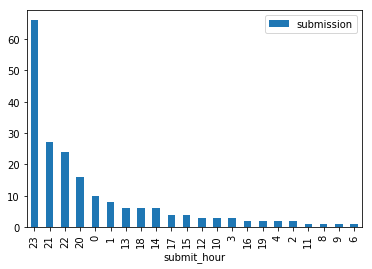

In [51]:
result1.plot(kind='bar')

#Most people submit the assignment in the late evening (i.e. after 8 PM)